## Randall Scott Taylor
### IST-652 Final Project 
#### THE WORLD ATLAS OF LANGUAGE STRUCTURES ONLINE DATASET
###### GEO-SPATIAL ANALYSIS
###### MONGODB CREATION 

# Winter 2020


In [102]:
#In order to complete the exploratory analysis of the wals dataset, the 
#researcher will require the following libraries:

import pandas as pd #for data processing, CSV file input/output
import os # directory structures access
import numpy as np # numpy arrays, linear algebra 
import matplotlib.pyplot as plt # this is for plotting
from sklearn.preprocessing import StandardScaler 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap 
from geopandas import GeoDataFrame
from shapely.geometry import Point
from ipyleaflet import *
from ipyleaflet import Map, GeoData, basemaps, LayersControl
import geopandas
import requests
import urllib.request
import folium
import json
from pymongo import MongoClient
from IPython.display import HTML
from folium.plugins import HeatMap

%matplotlib inline

# WALS DATASET 
## ETL

In [74]:

for dirname, dirnames, filenames in os.walk('../IST652FinalProject'):
    # print path to all subdirectories first.
    for subdirname in dirnames:
        print(os.path.join(dirname, subdirname))

    # print path to all filenames.
    for filename in filenames:
        print(os.path.join(dirname, filename))

../IST652FinalProject\.ipynb_checkpoints
../IST652FinalProject\wals-dataset
../IST652FinalProject\austronesian.pdf
../IST652FinalProject\austronesian.png
../IST652FinalProject\ie_lang.pdf
../IST652FinalProject\ie_lang.png
../IST652FinalProject\language.csv
../IST652FinalProject\leaflet_ie_lang.js
../IST652FinalProject\leaflet_lang_gdf.js
../IST652FinalProject\niger-congo.pdf
../IST652FinalProject\niger-congo.png
../IST652FinalProject\RandallTaylor.final_project.ipynb
../IST652FinalProject\RandallTaylor.HW1.ipynb
../IST652FinalProject\RandallTaylor.HW2.ipynb
../IST652FinalProject\RandalTaylor-Homework2OLD.ipynb
../IST652FinalProject\wals-dataset.zip
../IST652FinalProject\wals2.json
../IST652FinalProject\wals_dataset.cldf.zip
../IST652FinalProject\wals_graphs.pdf
../IST652FinalProject\wals_language.csv.zip
../IST652FinalProject\wals_source.bib.zip
../IST652FinalProject\.ipynb_checkpoints\RandallTaylor.final_project-checkpoint.ipynb
../IST652FinalProject\.ipynb_checkpoints\RandallTaylor.H

In [75]:
# Pre-read of the data 
lang_df = pd.read_csv('language.csv')
#Pre-Read Shape of the data
lang_df.shape

(2679, 202)

In [76]:
nRowsRead = 2679 #specify a specific number if the researcher doesn't 
#want to read in the entire language.csv file. 

#read in the language.csv as a pd 
lang_df = pd.read_csv('language.csv', delimiter=',', nrows = nRowsRead)
lang_df.dataframeName = 'language.csv'
nRow, nCol = lang_df.shape 
print(f'{nRow} rows and {nCol} columns: \nWill be utilized from the WALS-Dataset')


2679 rows and 202 columns: 
Will be utilized from the WALS-Dataset


In [77]:
#Take a quick look at the data thus far
lang_df.head(10)

wals_code iso_code glottocode              Name   latitude   longitude  \
0       aab      NaN        NaN     Arapesh (Abu)  -3.450000  142.950000   
1       aar      aiw   aari1239              Aari   6.000000   36.583333   
2       aba      aau   abau1245              Abau  -4.000000  141.250000   
3       abb      shu   chad1249  Arabic (Chadian)  13.833333   20.833333   
4       abd      abi   abid1235            Abidji   5.666667   -4.583333   
5       abe      apc   nort3139   Arabic (Beirut)  33.916667   35.500000   
6       abh      abv   baha1259  Arabic (Bahrain)  26.000000   50.500000   
7       abi      axb   abip1241            Abipón -29.000000  -61.000000   
8       abk      abk   abkh1244            Abkhaz  43.083333   41.000000   
9       abm      akz   alab1237           Alabama  32.333333  -87.416667   

                 genus               family      macroarea countrycodes  ...  \
0       Kombio-Arapesh           Torricelli            NaN           PG  ...   
1         South Omotic         Afro-Asiatic         Africa           ET  ...   
2          Upper Sepik                Sepik      Papunesia           PG  ...   
3              Semitic         Afro-Asiatic         Africa           TD  ...   
4                  Kwa          Niger-Congo         Africa           CI  ...   
5              Semitic         Afro-Asiatic        Eurasia           LB  ...   
6              Semitic         Afro-Asiatic        Eurasia           BH  ...   
7     South Guaicuruan           Guaicuruan  South America           AR  ...   
8  Northwest Caucasian  Northwest Caucasian        Eurasia           GE  ...   
9            Muskogean            Muskogean  North America           US  ...   

  137B M in Second Person Singular  136B M in First Person Singular  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                              NaN                              NaN   
4                              NaN                              NaN   
5                              NaN                              NaN   
6                              NaN                              NaN   
7                              NaN                              NaN   
8    2 m in second person singular  1 No m in first person singular   
9                              NaN                              NaN   

  109B Other Roles of Applied Objects 10B Nasal Vowels in West Africa  \
0                                 NaN                             NaN   
1                                 NaN                             NaN   
2                                 NaN                             NaN   
3                                 NaN                             NaN   
4                                 NaN                             NaN   
5                                 NaN                             NaN   
6                                 NaN                             NaN   
7                                 NaN                             NaN   
8                        1 Instrument                             NaN   
9                                 NaN                             NaN   

  25B Zero Marking of A and P Arguments  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   
5                                   NaN   
6                                   NaN   
7                                   NaN   
8                    2 Non-zero marking   
9                                   NaN   

  21B Exponence of Tense-Aspect-Mood Inflection  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                   

# Missing values exist, leave a NaN if not, run following
 >> # Fill first_column_ column
print("Filling Column missing data column...")
lanf_df['Column of Choice'].fillna(-1, inplace=True)

In [78]:
#Examination of the Columns contained within DataSet
lang_df.columns

Index(['wals_code', 'iso_code', 'glottocode', 'Name', 'latitude', 'longitude',
       'genus', 'family', 'macroarea', 'countrycodes',
       ...
       '137B M in Second Person Singular', '136B M in First Person Singular',
       '109B Other Roles of Applied Objects',
       '10B Nasal Vowels in West Africa',
       '25B Zero Marking of A and P Arguments',
       '21B Exponence of Tense-Aspect-Mood Inflection',
       '108B Productivity of the Antipassive Construction',
       '130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand'',
       '58B Number of Possessive Nouns',
       '79B Suppletion in Imperatives and Hortatives'],
      dtype='object', length=202)

# What is the frequency count of the language’s determinate upon there macroarea? 

In [79]:
#Distribution graphs (hisogram/bargraph) of Column Data:

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.xlabel("Data Distribution Graphs")
    plt.savefig('wals_graphs.pdf', dpi=700)
    plt.show()

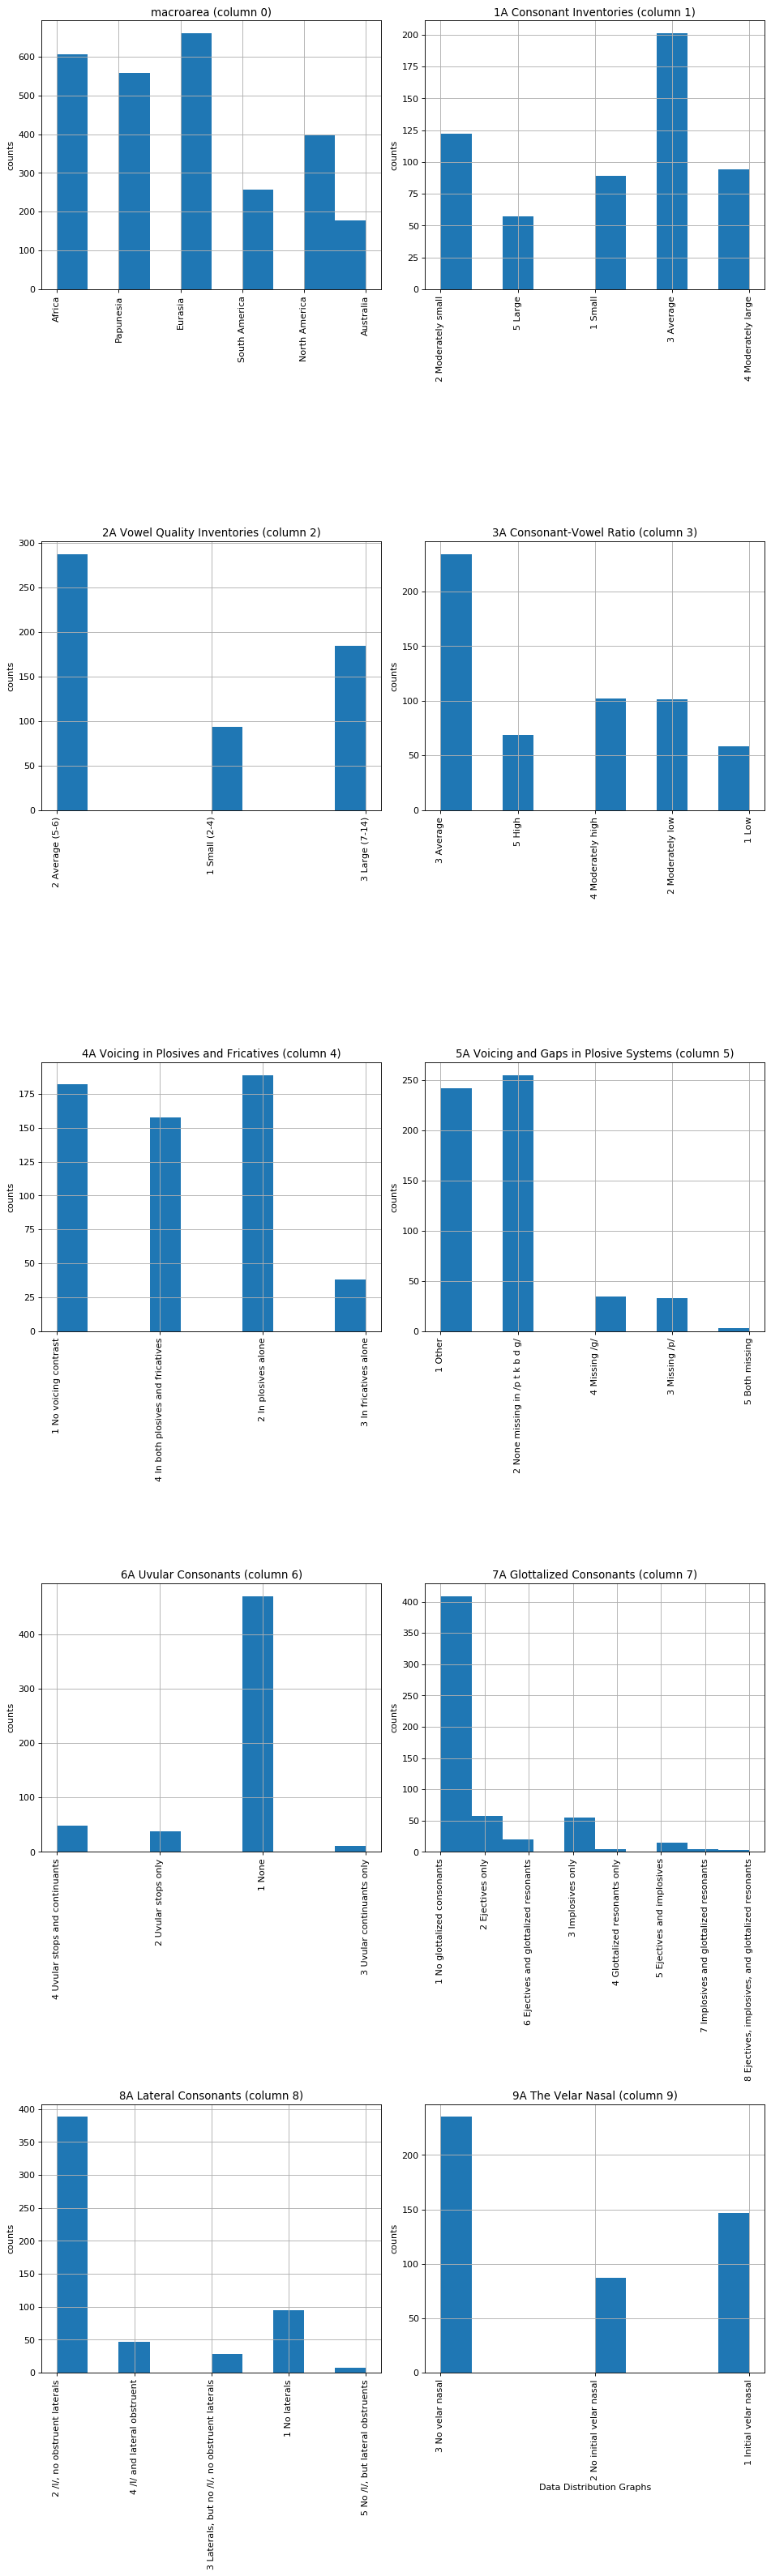

In [80]:
plotPerColumnDistribution(lang_df, 10, 2)

In [49]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

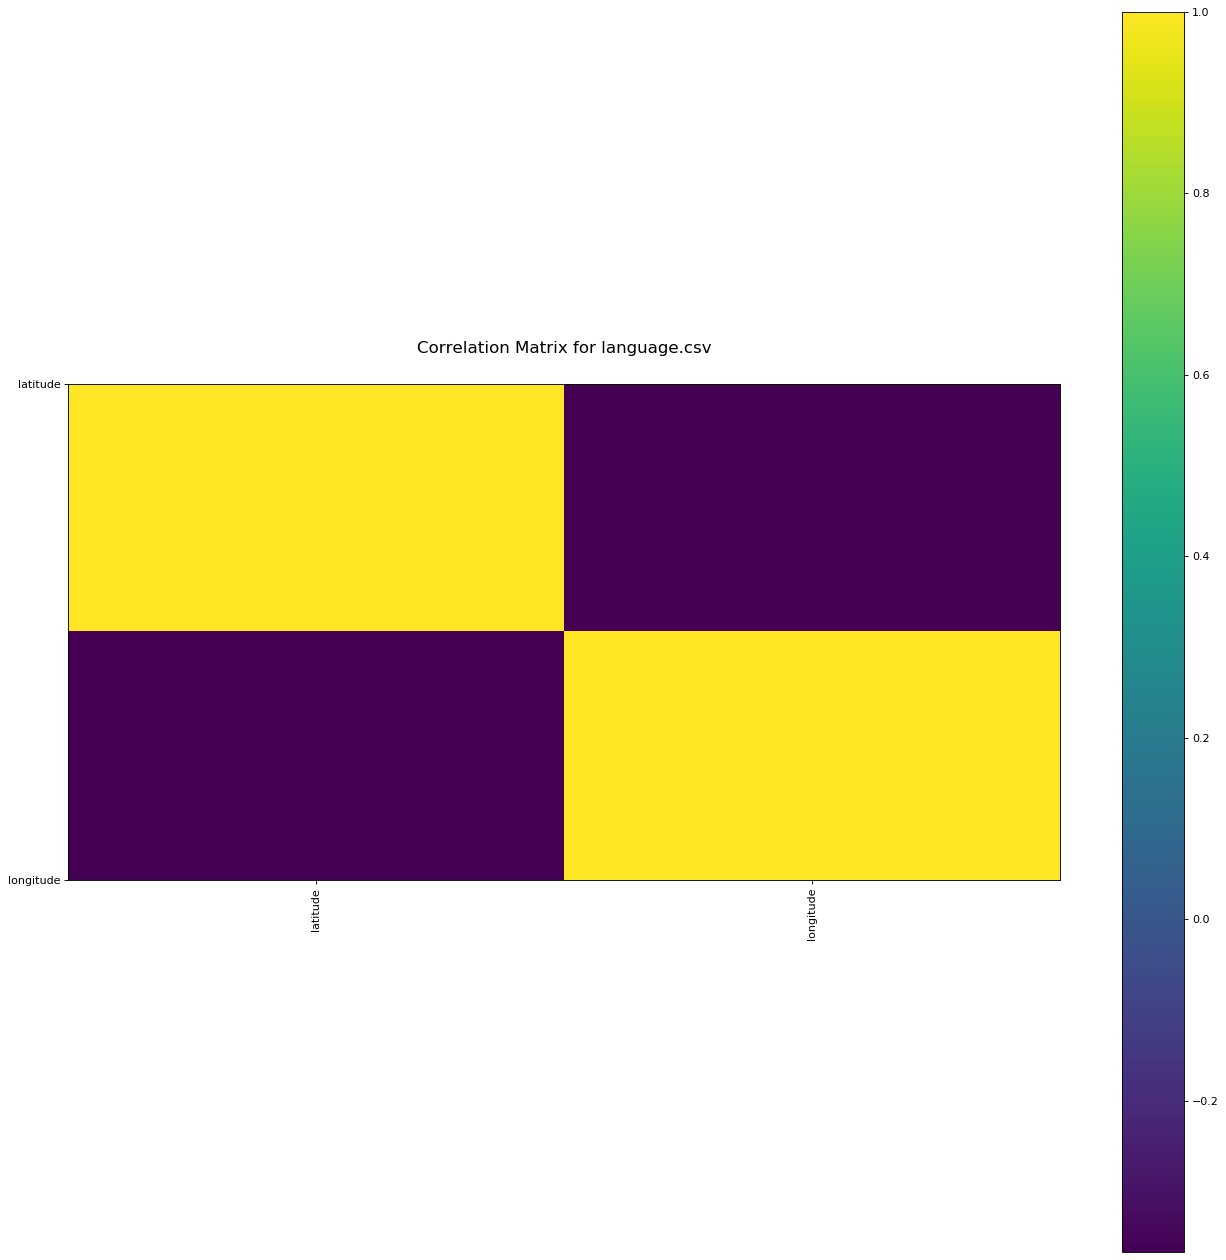

In [50]:
plotCorrelationMatrix(lang_df, 20)



In [81]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

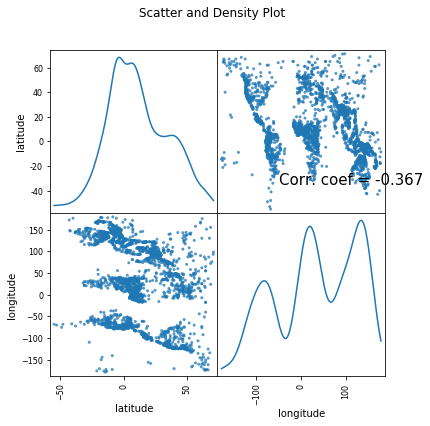

In [52]:
plotScatterMatrix(lang_df, 6, 15)

# What are the major language families counts of each respective individual language’s family?

In [82]:
# establish 'major families' in order to further understand the data to answer 
#What are the major language families counts of each respective 
#individual language’s family?

#top 20
major_families_20 = lang_df.groupby('family').size().reset_index(name='count').sort_values(by='count', ascending=False).head(20)

In [83]:
#inspect
major_families_20

family  count
158        Niger-Congo    327
14        Austronesian    325
86       Indo-European    176
185       Sino-Tibetan    149
0         Afro-Asiatic    145
167       Pama-Nyungan    122
215   Trans-New Guinea     88
255              other     72
5               Altaic     65
166       Oto-Manguean     56
13      Austro-Asiatic     49
62     Eastern Sudanic     47
225        Uto-Aztecan     44
138              Mayan     35
4                Algic     31
132              Mande     29
155  Nakh-Daghestanian     28
11            Arawakan     28
222             Uralic     27
37     Central Sudanic     26

# Pie Plot of Major Families Languages 

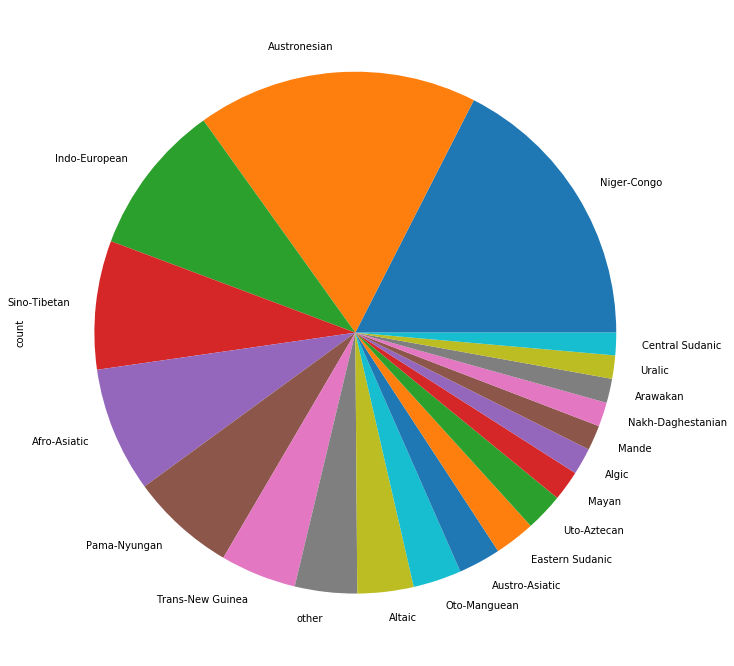

In [84]:
ax = major_families_20.plot(kind='pie', y='count', subplots=True, figsize=(16, 12), labels=major_families_20['family'], legend=False)

# TOP 10 Language Families 


In [85]:
# establish 'major families' in order to further understand the data to answer 
#What are the major language families counts of each respective 
#individual language’s family?

#top 20
major_families_10 = lang_df.groupby('family').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

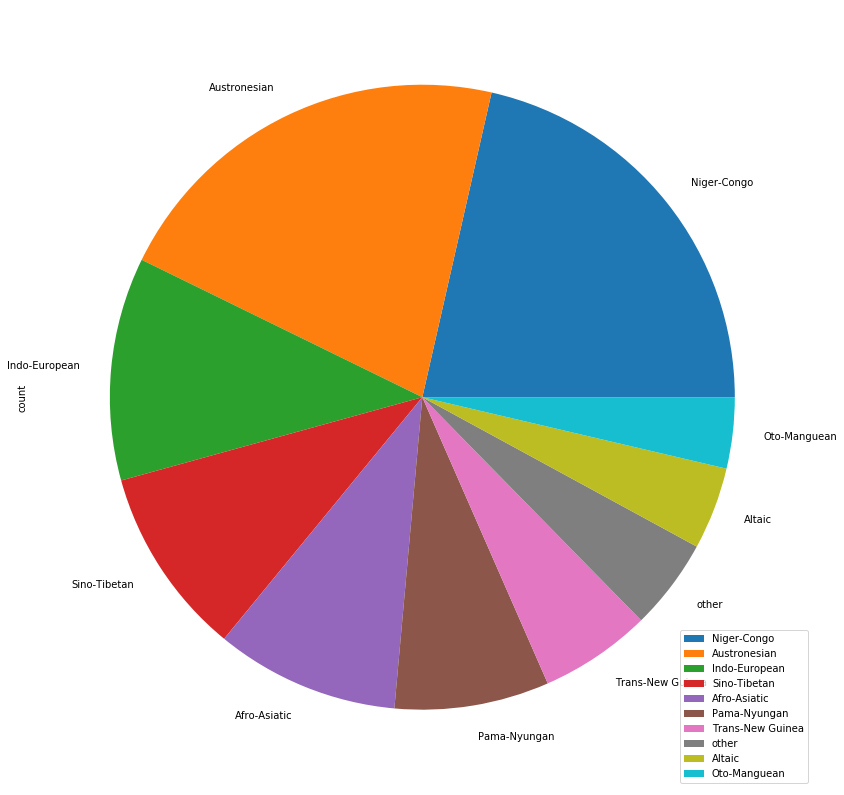

In [86]:
ax = major_families_10.plot(kind='pie', y='count', subplots=True, figsize=(14, 24), labels=major_families_20['family'], legend=True)

In [87]:
# establish 'major families macroarea frequency distribution' in order to further understand the data to answer 
#What are the major language families counts of each respective 
#individual language’s family?

#top 10
macro_families_10 = lang_df.groupby('macroarea').size().reset_index(name='count').sort_values(by='count', ascending=False).head(7)

In [88]:
macro_families_10

macroarea  count
2        Eurasia    660
0         Africa    607
4      Papunesia    558
3  North America    398
5  South America    257
1      Australia    177

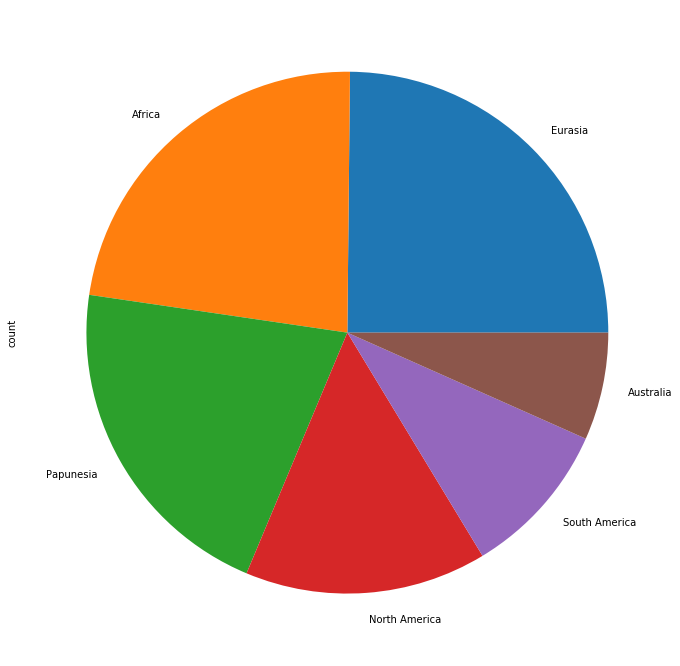

In [89]:
ax2 = macro_families_10.plot(kind='pie', y='count', subplots=True, figsize=(16, 12), labels=macro_families_10['macroarea'], legend=False)

# GEOSPATIAL ANALYSIS TOP THREE LANGUAGE FAMILIES 

# NO. 1 
## Niger-Congo Language Family  


In [90]:
#Geospatial Analysis of the data Largest Family : Niger-Congo  
niger_congo = lang_df[lang_df['family'] == 'Niger-Congo']



C:\Users\randa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\randa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\randa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


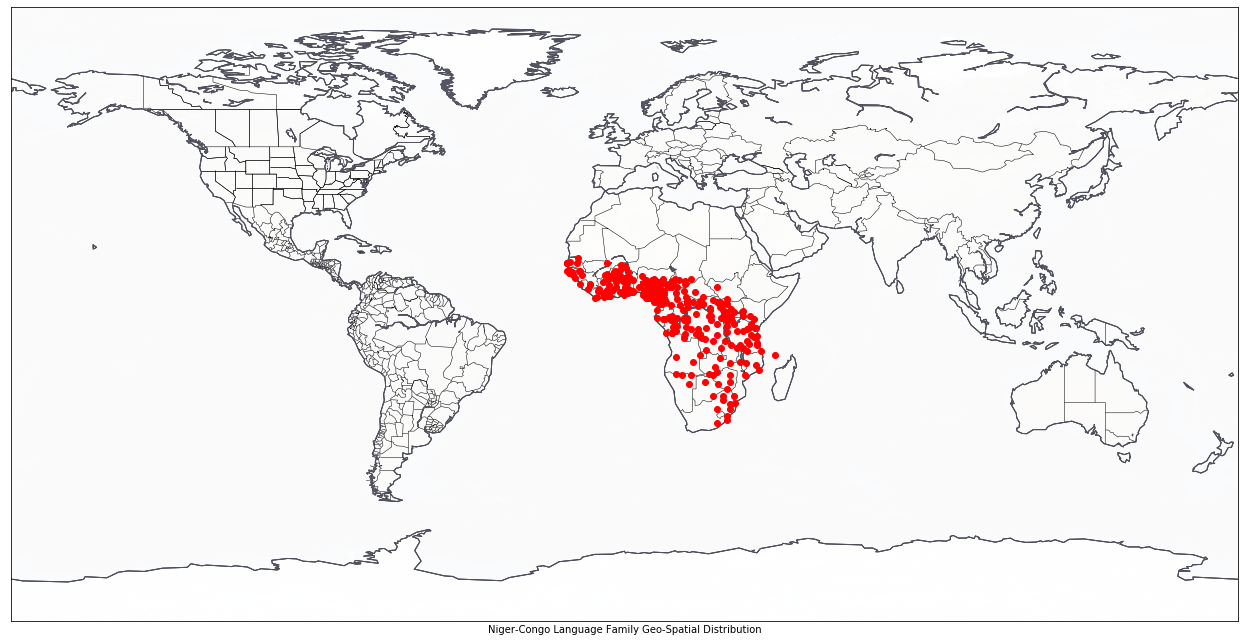

In [91]:
plt.figure(figsize=(22,14))
earth = Basemap()
earth.bluemarble(alpha=0.02)
earth.drawcoastlines()
earth.drawstates()
earth.drawcountries()
earth.drawcoastlines(color='#555566', linewidth=1)
plt.scatter(niger_congo.longitude, niger_congo.latitude, c='red', alpha =1, zorder=10)
plt.xlabel("Niger-Congo Language Family Geo-Spatial Distribution")
plt.savefig('niger-congo.pdf', dpi=700)

# NO. 2
## Austronesian Language Family 

In [92]:
#Geospatial Analysis of the data Largest Family : Niger-Congo  
austroneasian = lang_df[lang_df['family'] == 'Austronesian']


C:\Users\randa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\randa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\randa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


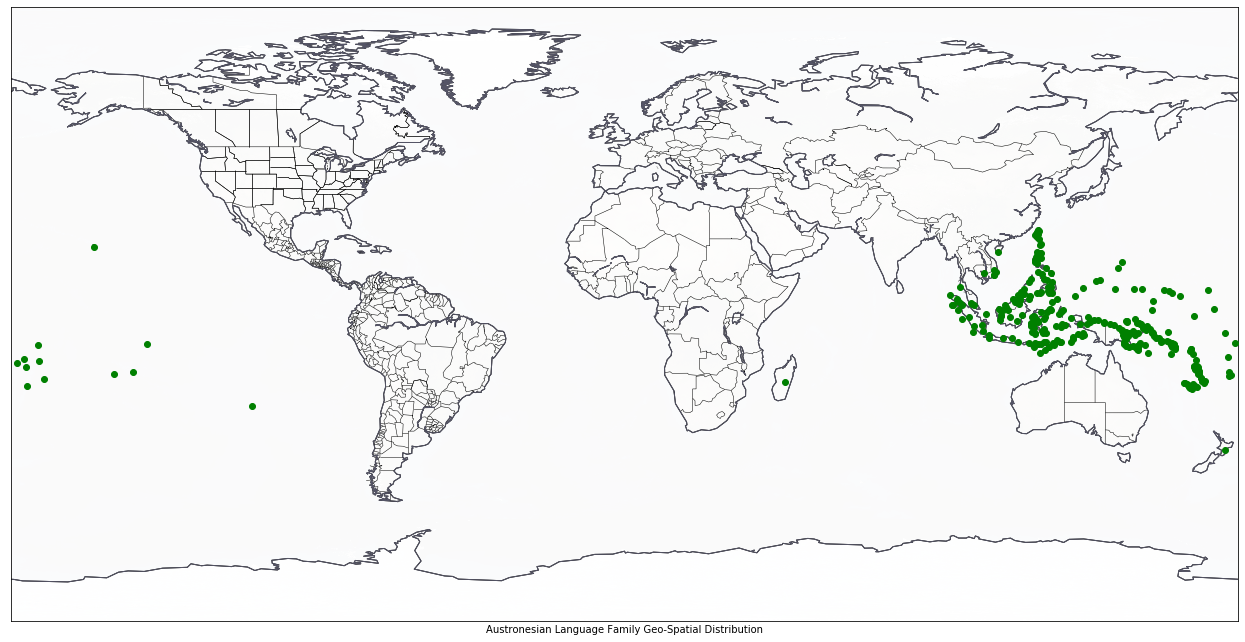

In [93]:
plt.figure(figsize=(22,14))
earth = Basemap()
earth.bluemarble(alpha=0.02)
earth.drawcoastlines()
earth.drawstates()
earth.drawcountries()
earth.drawcoastlines(color='#555566', linewidth=1)
plt.scatter(austroneasian.longitude, austroneasian.latitude, c='green', alpha =1, zorder=10)
plt.xlabel("Austronesian Language Family Geo-Spatial Distribution")
plt.savefig('austronesian.pdf', dpi=700)

# NO. 3
## Indo-European Language Family  



In [94]:
#Geospatial Analysis of the data Largest Family : Niger-Congo  
ie_lang = lang_df[lang_df['family'] == 'Indo-European']

C:\Users\randa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\randa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\randa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


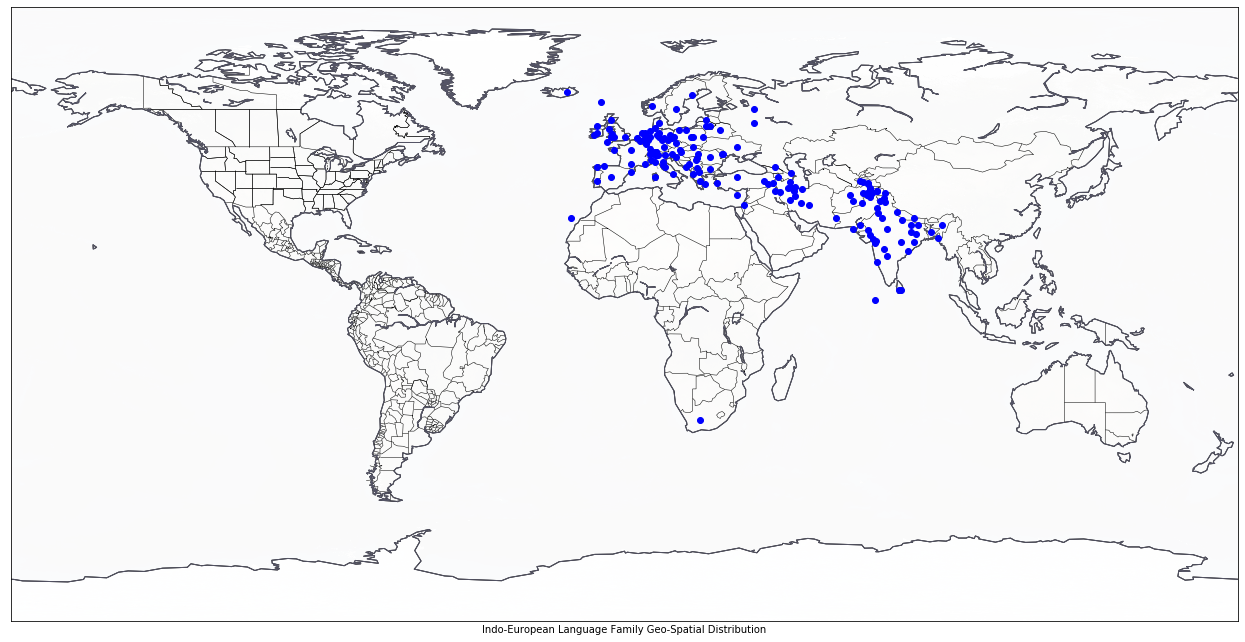

In [95]:
plt.figure(figsize=(22, 14))
earth = Basemap()
earth.bluemarble(alpha=0.02)
earth.drawcoastlines()
earth.drawstates()
earth.drawcountries()
earth.drawcoastlines(color ='#555566', linewidth=1)
plt.scatter(ie_lang.longitude, ie_lang.latitude, c='blue', alpha=1, zorder=10)
plt.xlabel("Indo-European Language Family Geo-Spatial Distribution")
plt.savefig('ie_lang.pdf', dpi=700)

# Geospatial Analysis:
## Interactive Mapping utlizing the Leaflet Package in Python Jupyter


In [191]:
# convert dataframe to geojson and save to js file
lang_gdf= GeoDataFrame(lang_df)
lang_gdf['geometry'] = lang_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
cols = ['wals_code', 'iso_code', 'glottocode', 'Name', 'latitude',
        'longitude', 'genus', 'family', 'macroarea', 'countrycodes']
#lang_gdf = lang_gdf.drop(cols, axis=1, inplace=False)
geojson = lang_gdf.to_json()
output_filename = 'leaflet_lang_gdf.js'
with open(output_filename, 'w') as output_file:
    output_file.write('var dataset = {};'.format(geojson, separators=(',',':')))

In [192]:
# convert dataframe to geojson and save to js file IE_LANG
ie_lang_gdf= GeoDataFrame(ie_lang)
ie_lang_gdf['geometry'] = ie_lang.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
cols = ['wals_code', 'iso_code', 'glottocode', 'Name', 'latitude',
        'longitude', 'genus', 'family', 'macroarea', 'countrycodes']
#lang_gdf = lang_gdf.drop(cols, axis=1, inplace=False)
geojson = ie_lang_gdf.to_json()
output_filename = 'leaflet_ie_lang.js'
with open(output_filename, 'w') as output_file:
    output_file.write('var dataset = {};'.format(geojson, separators=(',',':')))

# The Interactive Java Script based map from the leaflet package

In [193]:
# Create interactive map based upon indo -european migration 
#ie_lang_gdf

countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#rivers = geopandas.read_file("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/physical/ne_10m_rivers_lake_centerlines.zip")
m_1 = Map(center=(52.3,8.0), zoom = 3, basemap= basemaps.Esri.WorldTopoMap)

geo_data = GeoData(geo_dataframe = ie_lang_gdf,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'countries')
#rivers_data = GeoData(geo_dataframe = rivers,
 #                  style={'color': 'purple', 'opacity':3, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
  #                 hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
   #                name = 'rivers')
#m_1.add_layer(rivers_data)
m_1.add_control(geo_data)
m_1.add_control(LayersControl())
m_1

Map(center=[52.3, 8.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_…

In [101]:
countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
rivers = geopandas.read_file("https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/physical/ne_10m_rivers_lake_centerlines.zip")
m = Map(center=(52.3,8.0), zoom = 3, basemap= basemaps.Esri.WorldTopoMap)

geo_data = GeoData(geo_dataframe = lang_gdf,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'countries')
rivers_data = GeoData(geo_dataframe = rivers,
                   style={'color': 'purple', 'opacity':3, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'rivers')
m.add_layer(rivers_data)
m.add_control(geo_data)
m.add_control(LayersControl())
m


Map(center=[52.3, 8.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_…

# Creation of a Document Based Database; for WALS geojson dataset


In [147]:
#establish client connection 
client = MongoClient('localhost', 27017)
# show existing databases
client.list_database_names()

['admin', 'bball', 'config', 'local', 'peopledb', 'usgs', 'wals']

In [148]:
db = client.wals
wals_collection = db.wals_collection
params = "Feature, coordinates,properties,language,id,macroarea, latitude, longitude"
params == "Feature, coordinates,properties,language,id,macroarea, latitude, longitude"

True

In [149]:
#the url that contains the geojson data 
QueryUrl = "https://wals.info/languoid.geojson?sEcho=1&iSortingCols=1&iSortCol_0=0&sSortDir_0=asc"
response = requests.get(QueryUrl)
data = response.json()


In [150]:
len(data)

3

In [151]:
for keys in data:
    print(data[keys])

FeatureCollection
[{'type': 'Feature', 'id': 'aar', 'geometry': {'type': 'Point', 'coordinates': [36.5833333333, 6.0]}, 'properties': {'language': {'id': 'aar', 'genus_pk': 9, 'macroarea': 'Africa', 'ascii_name': 'aari', 'description': None, 'iso_codes': 'aiw', 'samples_200': False, 'pk': 1668, 'name': 'Aari', 'latitude': 6.0, 'jsondata': {}, 'samples_100': False, 'markup_description': None, 'longitude': 36.5833333333}, 'name': 'Aari', 'icon': 'https://wals.info/static/icons/cccc.png'}}, {'type': 'Feature', 'id': 'aba', 'geometry': {'type': 'Point', 'coordinates': [141.25, -4.0]}, 'properties': {'language': {'id': 'aba', 'genus_pk': 367, 'macroarea': 'Papunesia', 'ascii_name': 'abau', 'description': None, 'iso_codes': 'aau', 'samples_200': False, 'pk': 968, 'name': 'Abau', 'latitude': -4.0, 'jsondata': {}, 'samples_100': False, 'markup_description': None, 'longitude': 141.25}, 'name': 'Abau', 'icon': 'https://wals.info/static/icons/dd00.png'}}, {'type': 'Feature', 'id': 'abz', 'geometr

In [152]:
#Search the database dict, by index 
#data['features'][0]
#data['features'][5]
data['features'][10]
#data['features'][200]
#data['features'][500]

#data['features'][1200]


{'type': 'Feature',
 'id': 'acg',
 'geometry': {'type': 'Point', 'coordinates': [287.75, 4.41666666667]},
 'properties': {'language': {'id': 'acg',
   'genus_pk': 781,
   'macroarea': 'South America',
   'ascii_name': 'achagua',
   'description': None,
   'iso_codes': 'aca',
   'samples_200': False,
   'pk': 1786,
   'name': 'Achagua',
   'latitude': 4.41666666667,
   'jsondata': {},
   'samples_100': False,
   'markup_description': None,
   'longitude': -72.25},
  'name': 'Achagua',
  'icon': 'https://wals.info/static/icons/cd00.png'}}

In [153]:
features = data['features']

In [154]:
features[245], id

({'type': 'Feature',
  'id': 'brl',
  'geometry': {'type': 'Point', 'coordinates': [83.8333333333, 28.8333333333]},
  'properties': {'language': {'id': 'brl',
    'genus_pk': 389,
    'macroarea': 'Eurasia',
    'ascii_name': 'baragaunle',
    'description': None,
    'iso_codes': 'loy',
    'samples_200': False,
    'pk': 30,
    'name': 'Baragaunle',
    'latitude': 28.8333333333,
    'jsondata': {},
    'samples_100': False,
    'markup_description': None,
    'longitude': 83.8333333333},
   'name': 'Baragaunle',
   'icon': 'https://wals.info/static/icons/fff0.png'}},
 <function id(obj, /)>)

In [155]:
find_coll = wals_collection.find()
#Index(['_id', 'type', 'id', 'geometry', 'properties'], dtype='object')

In [156]:
#BUILD A LIST ARRAY 
#print(find_coll)
print(find_coll)

In [157]:
array = list(find_coll)

In [158]:
array

[{'_id': ObjectId('5e5a9250ae2c160f55568fde'),
  'type': 'Feature',
  'id': 'aar',
  'geometry': {'type': 'Point', 'coordinates': [36.5833333333, 6.0]},
  'properties': {'language': {'id': 'aar',
    'genus_pk': 9,
    'macroarea': 'Africa',
    'ascii_name': 'aari',
    'description': None,
    'iso_codes': 'aiw',
    'samples_200': False,
    'pk': 1668,
    'name': 'Aari',
    'latitude': 6.0,
    'jsondata': {},
    'samples_100': False,
    'markup_description': None,
    'longitude': 36.5833333333},
   'name': 'Aari',
   'icon': 'https://wals.info/static/icons/cccc.png'}},
 {'_id': ObjectId('5e5a9250ae2c160f55568fdf'),
  'type': 'Feature',
  'id': 'aba',
  'geometry': {'type': 'Point', 'coordinates': [141.25, -4.0]},
  'properties': {'language': {'id': 'aba',
    'genus_pk': 367,
    'macroarea': 'Papunesia',
    'ascii_name': 'abau',
    'description': None,
    'iso_codes': 'aau',
    'samples_200': False,
    'pk': 968,
    'name': 'Abau',
    'latitude': -4.0,
    'jsondata':

In [159]:
def print_features_data(features):
    for feature in features:
        try:
            wals_collection.insert_one(feature)
        except:
            pass
    print('\n Language: ',feature['id'])
    print('\n Latitude and Longitude: ',feature['geometry'])
    print('\n Language: ',feature['properties'])
  

In [160]:
print_features_data(array[:24])


 Language:  adt

 Latitude and Longitude:  {'type': 'Point', 'coordinates': [39.7, 45.2166666667]}

 Language:  {'language': {'id': 'adt', 'genus_pk': 325, 'macroarea': 'Eurasia', 'ascii_name': 'adyghe (temirgoy)', 'description': None, 'iso_codes': 'ady', 'samples_200': False, 'pk': 269, 'name': 'Adyghe (Temirgoy)', 'latitude': 45.2166666667, 'jsondata': {}, 'samples_100': False, 'markup_description': None, 'longitude': 39.7}, 'name': 'Adyghe (Temirgoy)', 'icon': 'https://wals.info/static/icons/t00d.png'}


In [161]:
df_list = []

In [162]:
for i in array:
    df_list.append(i)

In [ ]:
#Create a dataframe from the MongoDB 

In [164]:
df = pd.DataFrame(df_list)

In [165]:
df

_id     type   id  \
0     5e5a9250ae2c160f55568fde  Feature  aar   
1     5e5a9250ae2c160f55568fdf  Feature  aba   
2     5e5a9250ae2c160f55568fe0  Feature  abz   
3     5e5a9250ae2c160f55568fe1  Feature  abw   
4     5e5a9250ae2c160f55568fe2  Feature  abd   
...                        ...      ...  ...   
5354  5e5adbfeae2c160f5556a4c8      NaN  NaN   
5355  5e5adbfeae2c160f5556a4c9      NaN  NaN   
5356  5e5adbfeae2c160f5556a4ca      NaN  NaN   
5357  5e5adbfeae2c160f5556a4cb      NaN  NaN   
5358  5e5ade7dae2c160f5556a4cc      NaN  NaN   

                                               geometry  \
0     {'type': 'Point', 'coordinates': [36.583333333...   
1      {'type': 'Point', 'coordinates': [141.25, -4.0]}   
2        {'type': 'Point', 'coordinates': [42.0, 44.0]}   
3      {'type': 'Point', 'coordinates': [287.75, 44.0]}   
4     {'type': 'Point', 'coordinates': [-4.583333333...   
...                                                 ...   
5354                                                NaN   
5355                                                NaN   
5356                                                NaN   
5357                                                NaN   
5358                                                NaN   

                                             properties  \
0     {'language': {'id': 'aar', 'genus_pk': 9, 'mac...   
1     {'language': {'id': 'aba', 'genus_pk': 367, 'm...   
2     {'language': {'id': 'abz', 'genus_pk': 325, 'm...   
3     {'language': {'id': 'abw', 'genus_pk': 17, 'ma...   
4     {'language': {'id': 'abd', 'genus_pk': 275, 'm...   
...                                                 ...   
5354                                                NaN   
5355                                                NaN   
5356                                                NaN   
5357                                                NaN   
5358                                                NaN   

                                               language             name  \
0                                                   NaN              NaN   
1                                                   NaN              NaN   
2                                                   NaN              NaN   
3                                                   NaN              NaN   
4                                                   NaN              NaN   
...                                                 ...              ...   
5354  {'id': 'zul', 'genus_pk': 274, 'macroarea': 'A...             Zulu   
5355  {'id': 'zno', 'genus_pk': 274, 'macroarea': 'A...  Zulu (Northern)   
5356  {'id': 'zso', 'genus_pk': 274, 'macroarea': 'A...  Zulu (Southern)   
5357  {'id': 'zun', 'genus_pk': 510, 'macroarea': 'N...             Zuni   
5358                                                NaN              NaN   

                                         icon  
0                                         NaN  
1                                         NaN  
2                                         NaN  
3                                         NaN  
4                                         NaN  
...                                       ...  
5354  https://wals.info/static/icons/d00d.png  
5355  https://wals.info/static/icons/d00d.png  
5356  https://wals.info/static/icons/d00d.png  
5357  https://wals.info/static/icons/tfff.png  
5358                                      NaN  

[5359 rows x 8 columns]

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 8 columns):
_id           5359 non-null object
type          2679 non-null object
id            2679 non-null object
geometry      2679 non-null object
properties    2679 non-null object
language      2679 non-null object
name          2679 non-null object
icon          2679 non-null object
dtypes: object(8)
memory usage: 335.1+ KB


In [167]:
df.size # size = number of total data points 

42872

In [168]:
df.shape # the shape of the data == the observations then columns 

(5359, 8)

In [169]:
df.columns

Index(['_id', 'type', 'id', 'geometry', 'properties', 'language', 'name',
       'icon'],
      dtype='object')

In [170]:
#clean the NaN data fields 
df = df.drop(columns = '_id')
df= df.drop(columns = 'type')
df= df.drop(columns = 'language')
df= df.drop(columns = 'name')
df= df.drop(columns = 'icon')


In [171]:
df = df.rename(columns = lambda col: col.replace(" ",""))

In [172]:
df[:20]

id                                           geometry  \
0   aar  {'type': 'Point', 'coordinates': [36.583333333...   
1   aba   {'type': 'Point', 'coordinates': [141.25, -4.0]}   
2   abz     {'type': 'Point', 'coordinates': [42.0, 44.0]}   
3   abw   {'type': 'Point', 'coordinates': [287.75, 44.0]}   
4   abd  {'type': 'Point', 'coordinates': [-4.583333333...   
5   abi   {'type': 'Point', 'coordinates': [299.0, -29.0]}   
6   abk  {'type': 'Point', 'coordinates': [41.0, 43.083...   
7   abv  {'type': 'Point', 'coordinates': [124.66666666...   
8   abu    {'type': 'Point', 'coordinates': [132.5, -0.5]}   
9   ace      {'type': 'Point', 'coordinates': [95.5, 5.5]}   
10  acg  {'type': 'Point', 'coordinates': [287.75, 4.41...   
11  acn     {'type': 'Point', 'coordinates': [98.5, 25.0]}   
12  ach  {'type': 'Point', 'coordinates': [304.83333333...   
13  aci  {'type': 'Point', 'coordinates': [269.5, 15.16...   
14  acl  {'type': 'Point', 'coordinates': [32.666666666...   
15  acu  {'type': 'Point', 'coordinates': [284.0, -2.66...   
16  acm    {'type': 'Point', 'coordinates': [239.0, 41.5]}   
17  aco  {'type': 'Point', 'coordinates': [252.41666666...   
18  ada  {'type': 'Point', 'coordinates': [-0.166666666...   
19  adg    {'type': 'Point', 'coordinates': [124.0, -8.2]}   

                                           properties  
0   {'language': {'id': 'aar', 'genus_pk': 9, 'mac...  
1   {'language': {'id': 'aba', 'genus_pk': 367, 'm...  
2   {'language': {'id': 'abz', 'genus_pk': 325, 'm...  
3   {'language': {'id': 'abw', 'genus_pk': 17, 'ma...  
4   {'language': {'id': 'abd', 'genus_pk': 275, 'm...  
5   {'language': {'id': 'abi', 'genus_pk': 696, 'm...  
6   {'language': {'id': 'abk', 'genus_pk': 325, 'm...  
7   {'language': {'id': 'abv', 'genus_pk': 417, 'm...  
8   {'language': {'id': 'abu', 'genus_pk': 493, 'm...  
9   {'language': {'id': 'ace', 'genus_pk': 519, 'm...  
10  {'language': {'id': 'acg', 'genus_pk': 781, 'm...  
11  {'language': {'id': 'acn', 'genus_pk': 380, 'm...  
12  {'language': {'id': 'ach', 'genus_pk': 457, 'm...  
13  {'language': {'id': 'aci', 'genus_pk': 250, 'm...  
14  {'language': {'id': 'acl', 'genus_pk': 320, 'm...  
15  {'language': {'id': 'acu', 'genus_pk': 197, 'm...  
16  {'language': {'id': 'acm', 'genus_pk': 173, 'm...  
17  {'language': {'id': 'aco', 'genus_pk': 209, 'm...  
18  {'language': {'id': 'ada', 'genus_pk': 330, 'm...  
19  {'language': {'id': 'adg', 'genus_pk': 417, 'm...

In [173]:
df1 = df.copy()
df1.replace(' ', np.nan, inplace = True)
df1


id                                           geometry  \
0     aar  {'type': 'Point', 'coordinates': [36.583333333...   
1     aba   {'type': 'Point', 'coordinates': [141.25, -4.0]}   
2     abz     {'type': 'Point', 'coordinates': [42.0, 44.0]}   
3     abw   {'type': 'Point', 'coordinates': [287.75, 44.0]}   
4     abd  {'type': 'Point', 'coordinates': [-4.583333333...   
...   ...                                                ...   
5354  NaN                                                NaN   
5355  NaN                                                NaN   
5356  NaN                                                NaN   
5357  NaN                                                NaN   
5358  NaN                                                NaN   

                                             properties  
0     {'language': {'id': 'aar', 'genus_pk': 9, 'mac...  
1     {'language': {'id': 'aba', 'genus_pk': 367, 'm...  
2     {'language': {'id': 'abz', 'genus_pk': 325, 'm...  
3     {'language': {'id': 'abw', 'genus_pk': 17, 'ma...  
4     {'language': {'id': 'abd', 'genus_pk': 275, 'm...  
...                                                 ...  
5354                                                NaN  
5355                                                NaN  
5356                                                NaN  
5357                                                NaN  
5358                                                NaN  

[5359 rows x 3 columns]

In [174]:
df1.loc[df['id'] == ' '] # show me the data with blanks 

Empty DataFrame
Columns: [id, geometry, properties]
Index: []

In [190]:
print("These are the value counts of the languages within the coordinates(geometry LON LAT) within the MongoDB")
print(df1['geometry'].value_counts()[df1['geometry'].value_counts()>0]) 
print(df1['id'].value_counts()[df1['id'].value_counts()>0])

These are the value counts of the languages within the coordinates(geometry LON LAT) within the MongoDB
{'type': 'Point', 'coordinates': [55.0, 65.0]}               2
{'type': 'Point', 'coordinates': [102.0, 31.5]}              2
{'type': 'Point', 'coordinates': [14.0, -5.5]}               2
{'type': 'Point', 'coordinates': [89.0, 29.0]}               2
{'type': 'Point', 'coordinates': [140.0, -22.8333333333]}    1
                                                            ..
{'type': 'Point', 'coordinates': [19.5, -18.0]}              1
{'type': 'Point', 'coordinates': [144.75, -4.25]}            1
{'type': 'Point', 'coordinates': [75.5, 28.0]}               1
{'type': 'Point', 'coordinates': [177.3, -17.0]}             1
{'type': 'Point', 'coordinates': [131.0, -11.5]}             1
Name: geometry, Length: 2675, dtype: int64
mja    1
psl    1
ngt    1
ayw    1
wlf    1
      ..
tof    1
tgw    1
blq    1
hid    1
gdk    1
Name: id, Length: 2679, dtype: int64
